In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
from numpy import isinf
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

In [11]:
# Step 1: Define the portfolio and gather data
portfolio = ['AMZN','BRK-A','GOOG','META','VTI','S&P500']  #portfolio
weights = [20,5,15,20,20,20]  #weights


                  AMZN     BRK-A        GOOG        META         VTI   S&P500
Date                                                                         
2018-04-16   72.074997  297181.0   51.898998  164.830002  137.720001  2677.84
2018-04-17   75.191498  298701.0   53.708000  168.660004  139.169998  2706.39
2018-04-18   76.391998  299205.0   53.604000  166.360001  139.360001  2708.64
2018-04-19   77.845497  300300.0   54.384998  168.100006  138.600006  2693.13
2018-04-20   76.374496  300140.0   53.647999  166.279999  137.500000  2670.14
...                ...       ...         ...         ...         ...      ...
2023-04-10  102.169998  476500.0  106.949997  214.750000  203.660004  4109.11
2023-04-11   99.919998  480800.0  106.120003  213.850006  203.869995  4108.94
2023-04-12   97.830002  483500.0  105.220001  214.000000  203.009995  4091.95
2023-04-13  102.400002  490760.0  108.190002  220.350006  205.649994  4146.22
2023-04-14  102.510002  496000.0  109.459999  221.490005  205.08

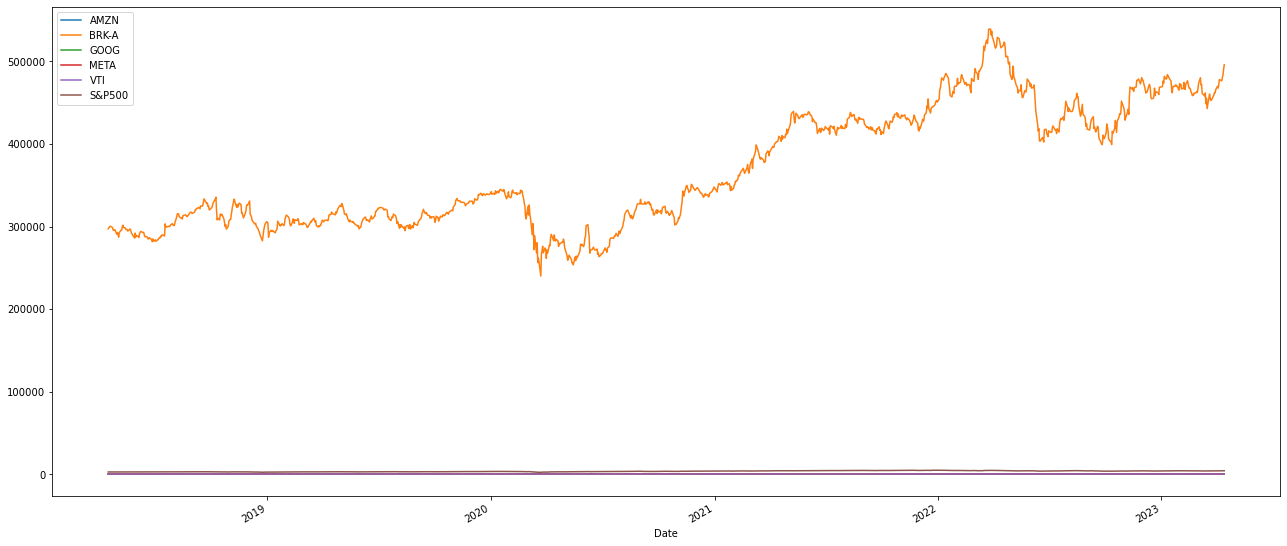

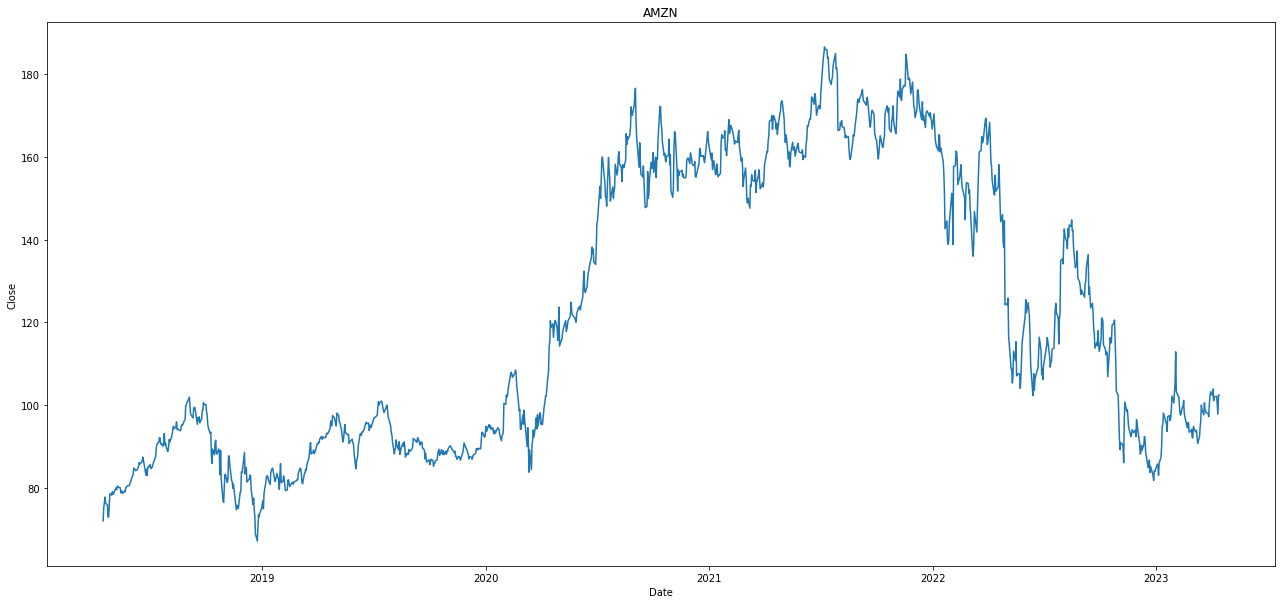

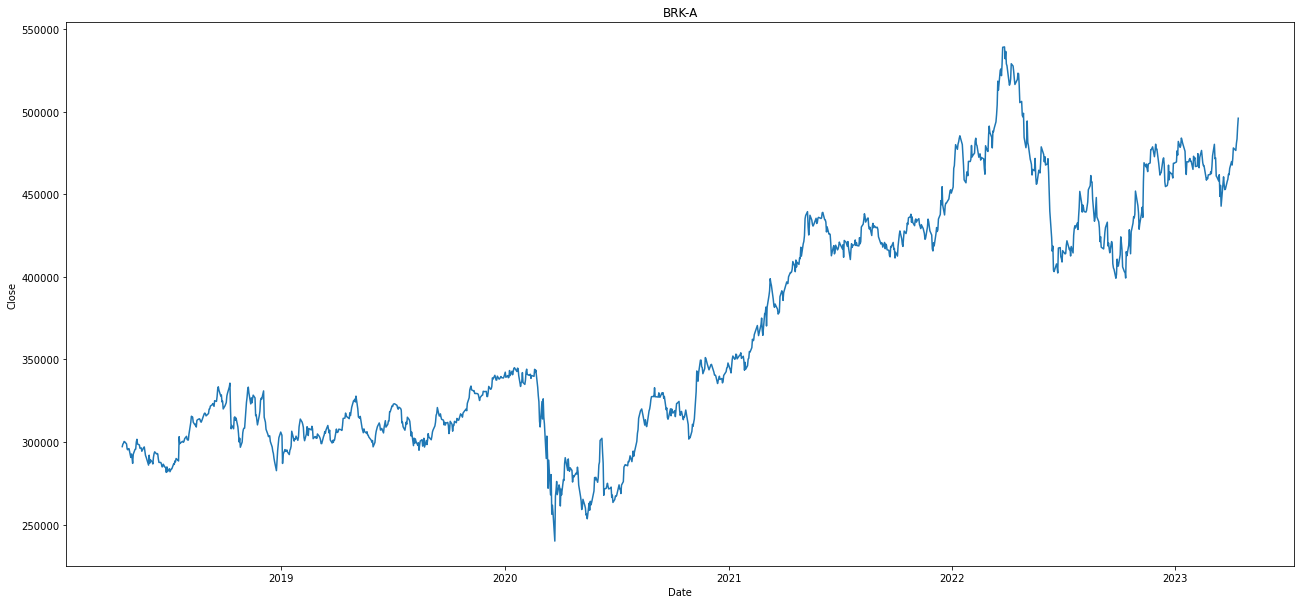

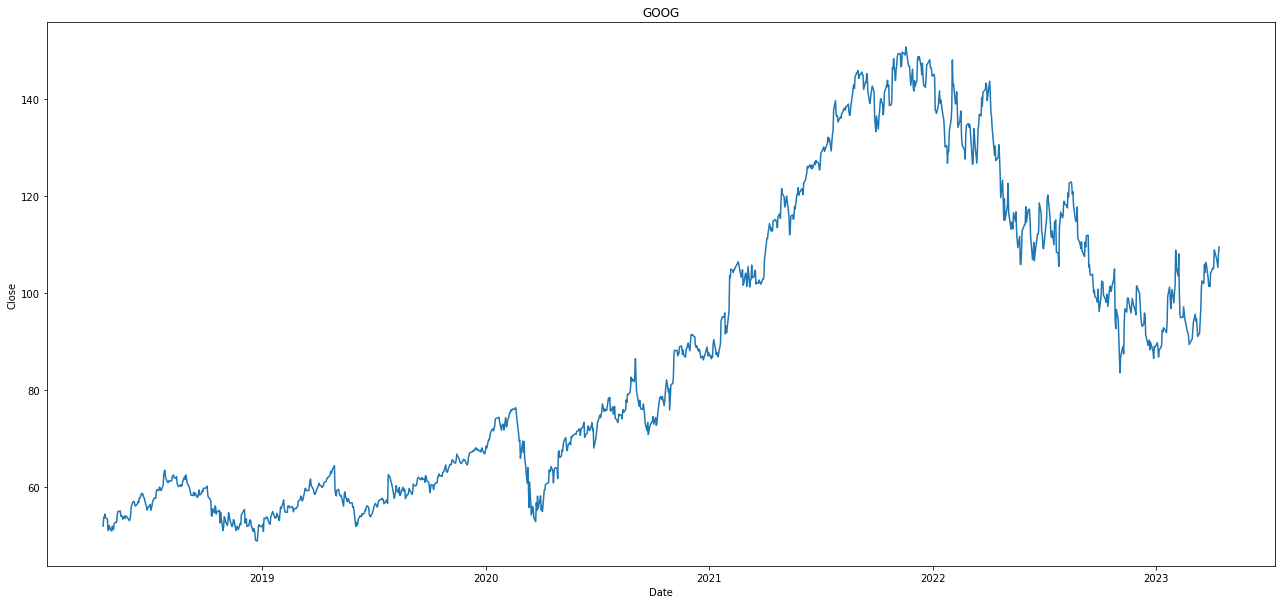

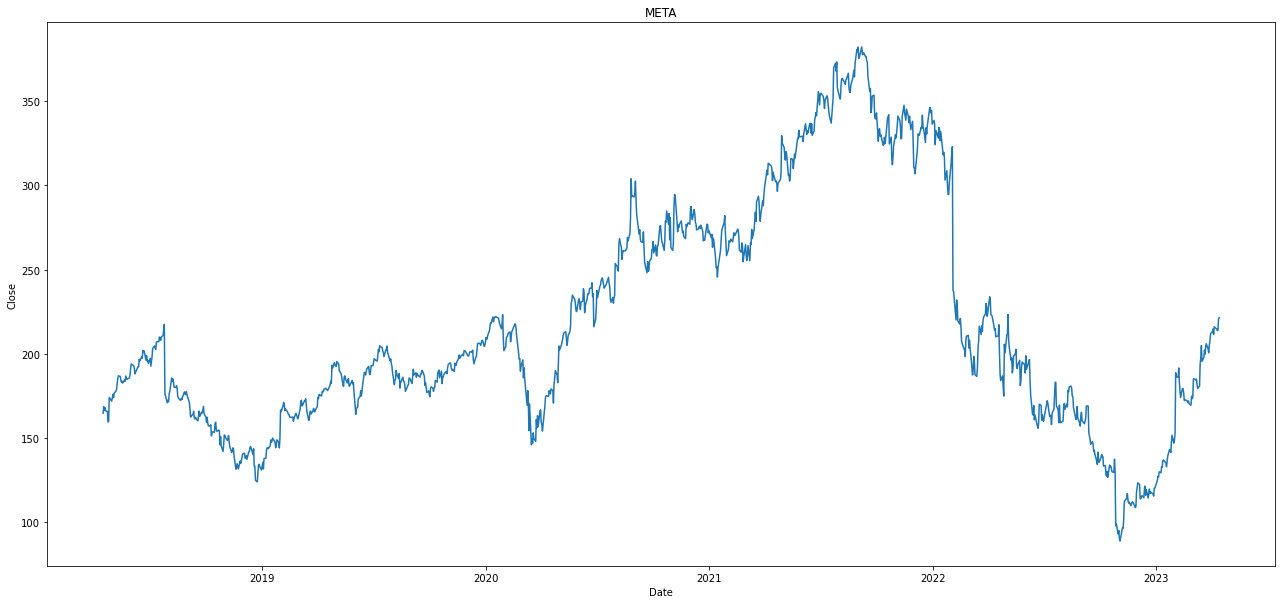

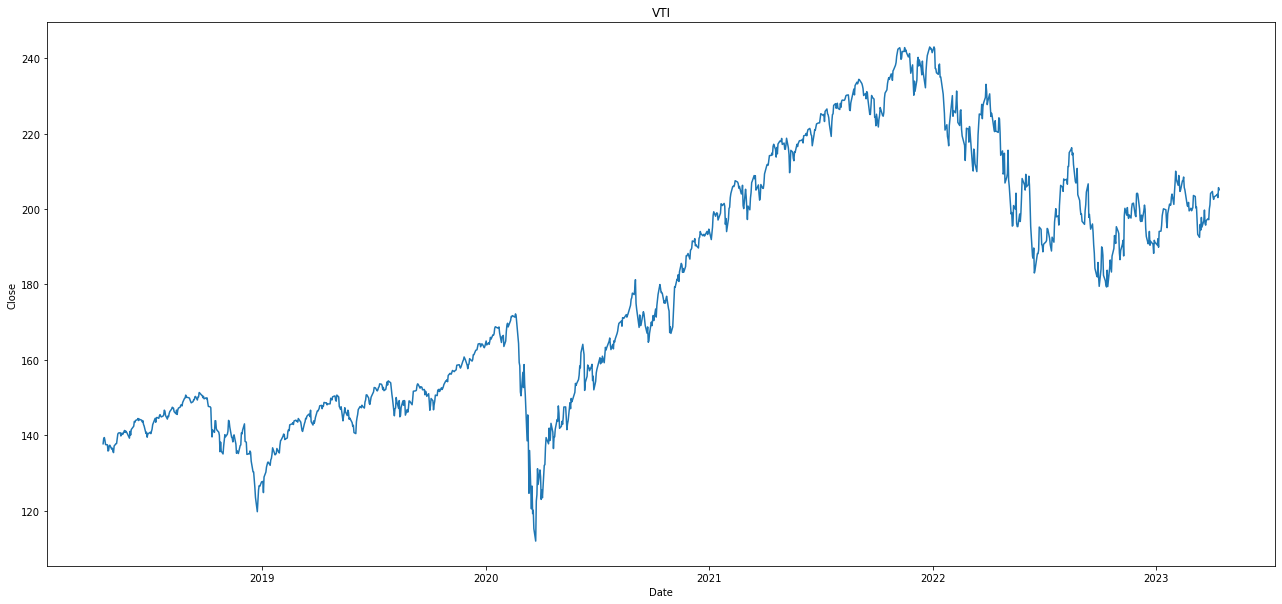

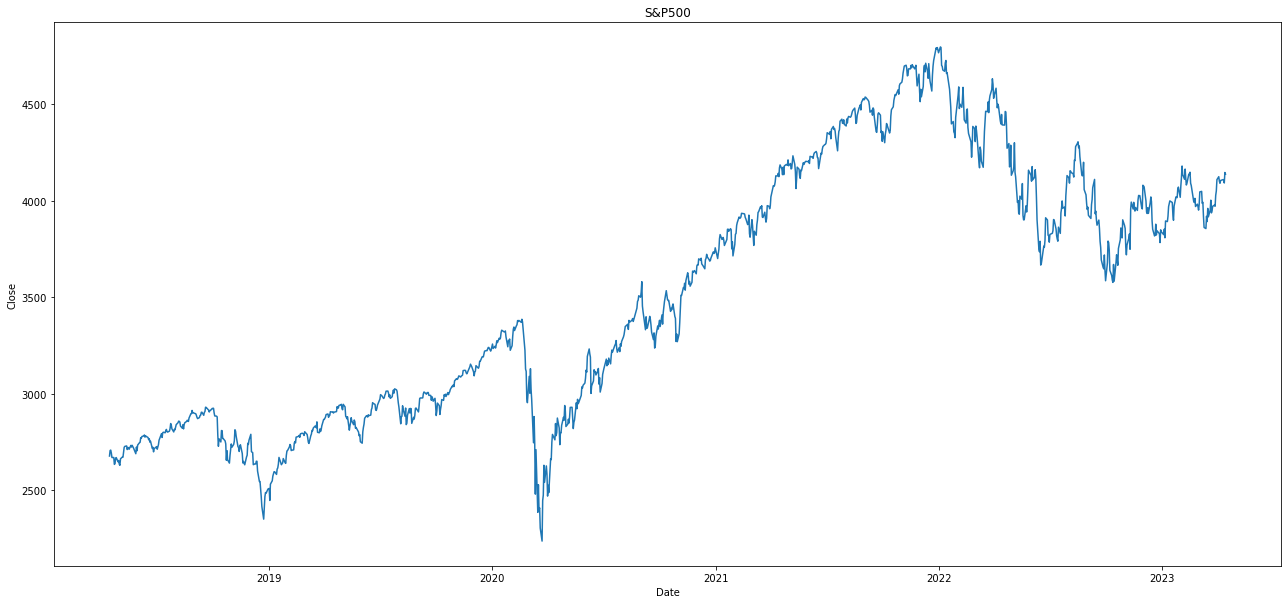

                 AMZN    BRK-A       GOOG       META       VTI  S&P500
Date                                                                  
2018-04-16        NaN      NaN        NaN        NaN       NaN     NaN
2018-04-17        NaN      NaN        NaN        NaN       NaN     NaN
2018-04-18        NaN      NaN        NaN        NaN       NaN     NaN
2018-04-19        NaN      NaN        NaN        NaN       NaN     NaN
2018-04-20        NaN      NaN        NaN        NaN       NaN     NaN
...               ...      ...        ...        ...       ...     ...
2023-04-10   8.669998  14795.0  17.599999  44.360001  4.180008  139.07
2023-04-11   6.159996  18888.0  16.020005  44.310013  3.679993  126.70
2023-04-12   3.599999  19975.0  14.919998  39.059998  3.489991  121.80
2023-04-13  10.230004  28325.0  17.680000  46.930008  5.649994  194.83
2023-04-14  10.380005  29210.0  17.150001  46.960006  4.770004  156.29

[1259 rows x 6 columns]


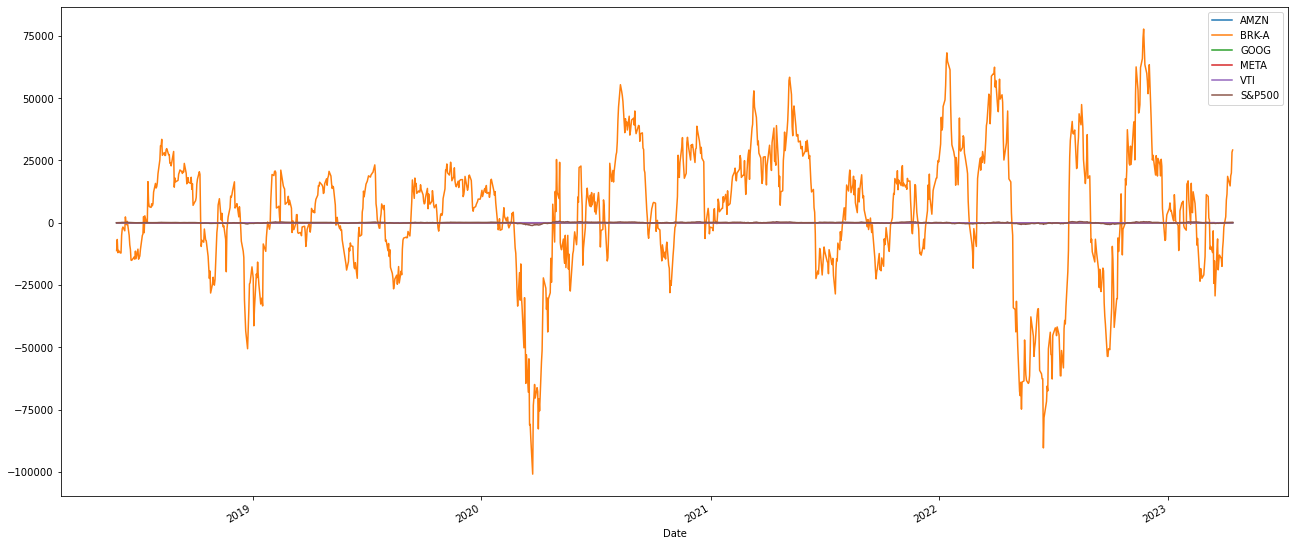

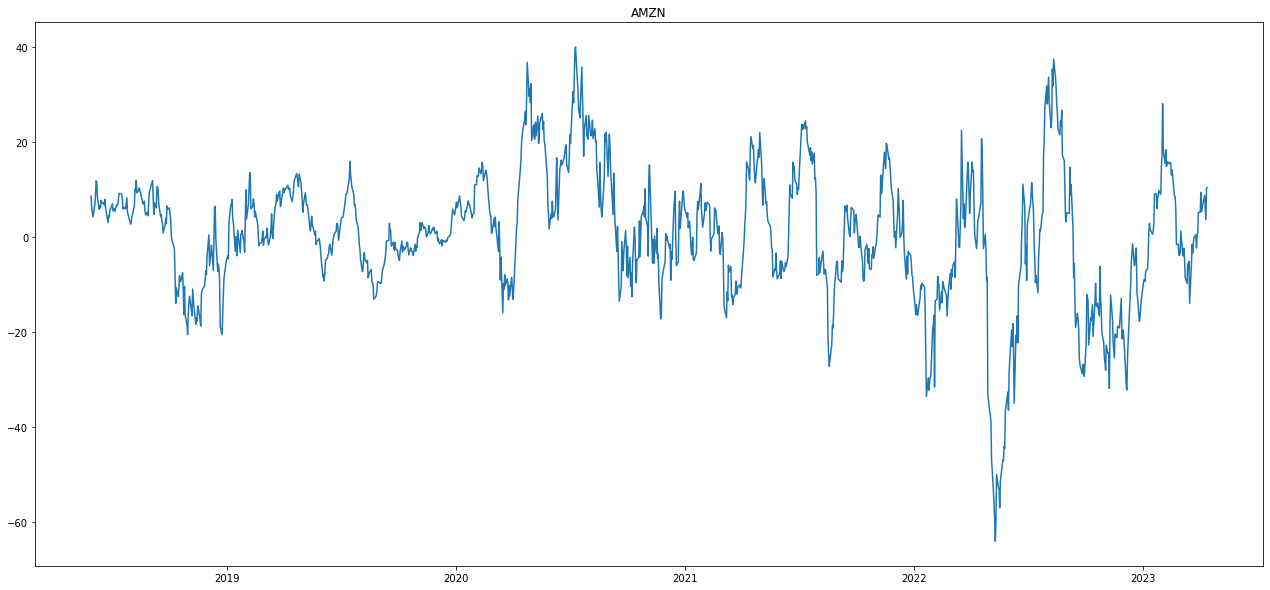

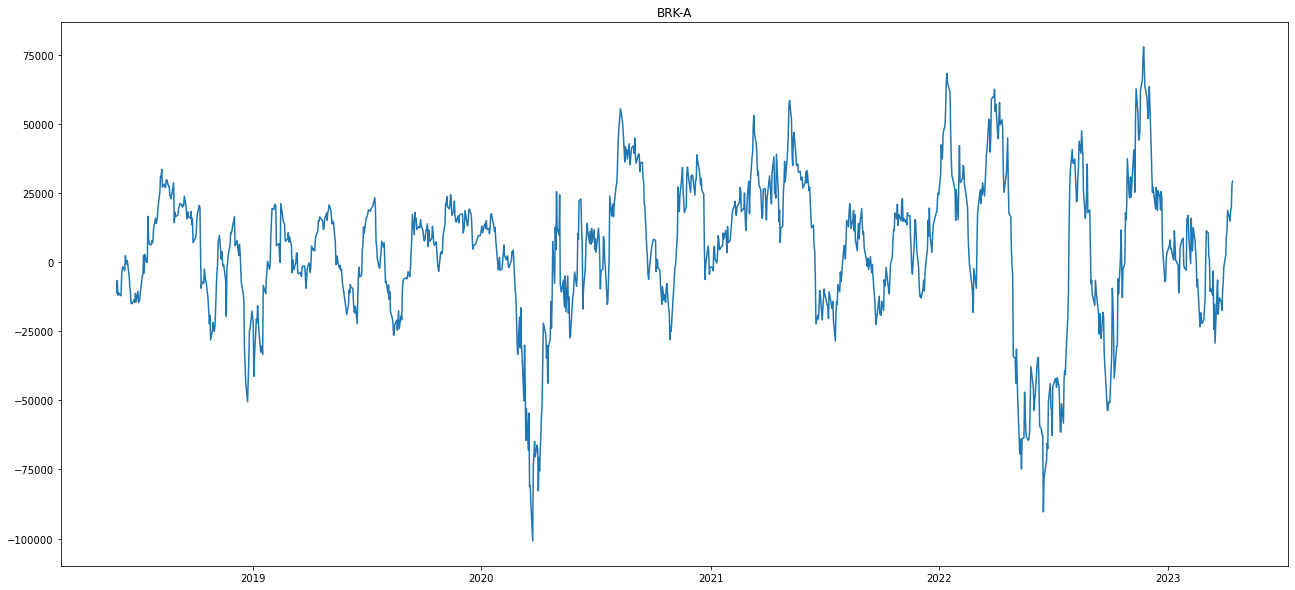

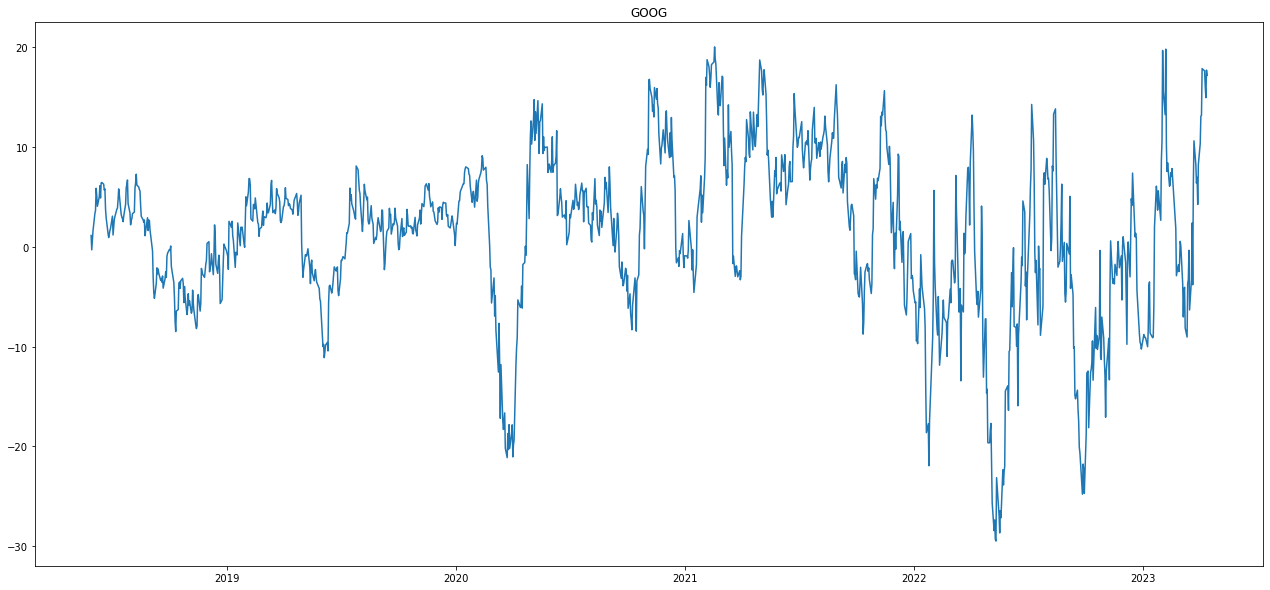

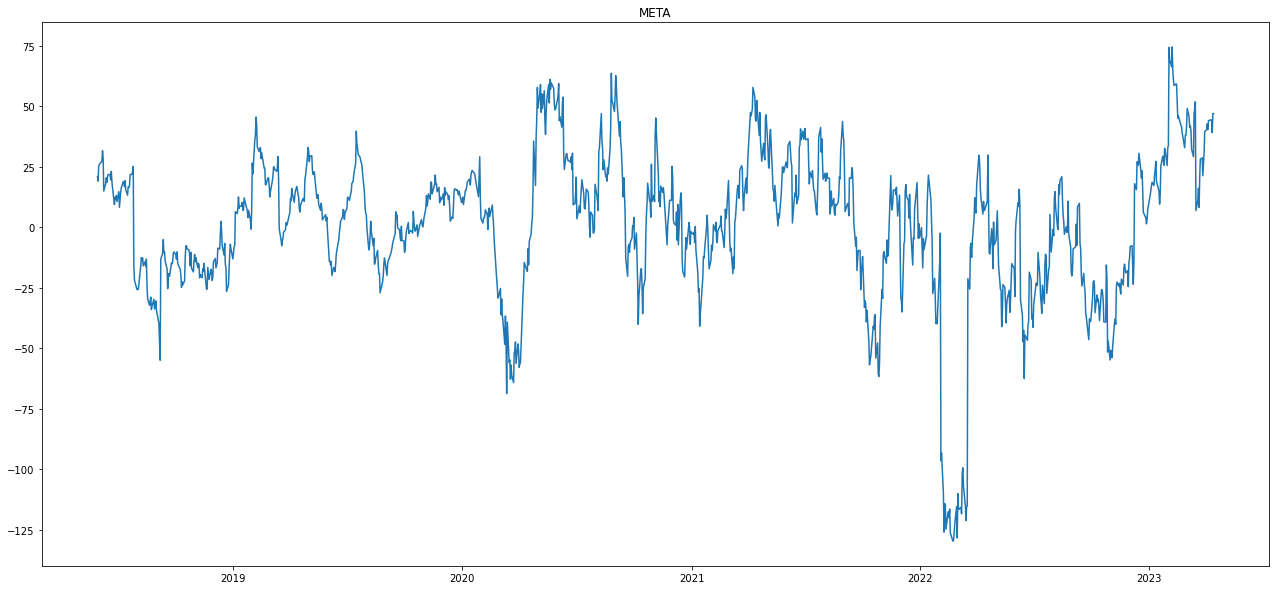

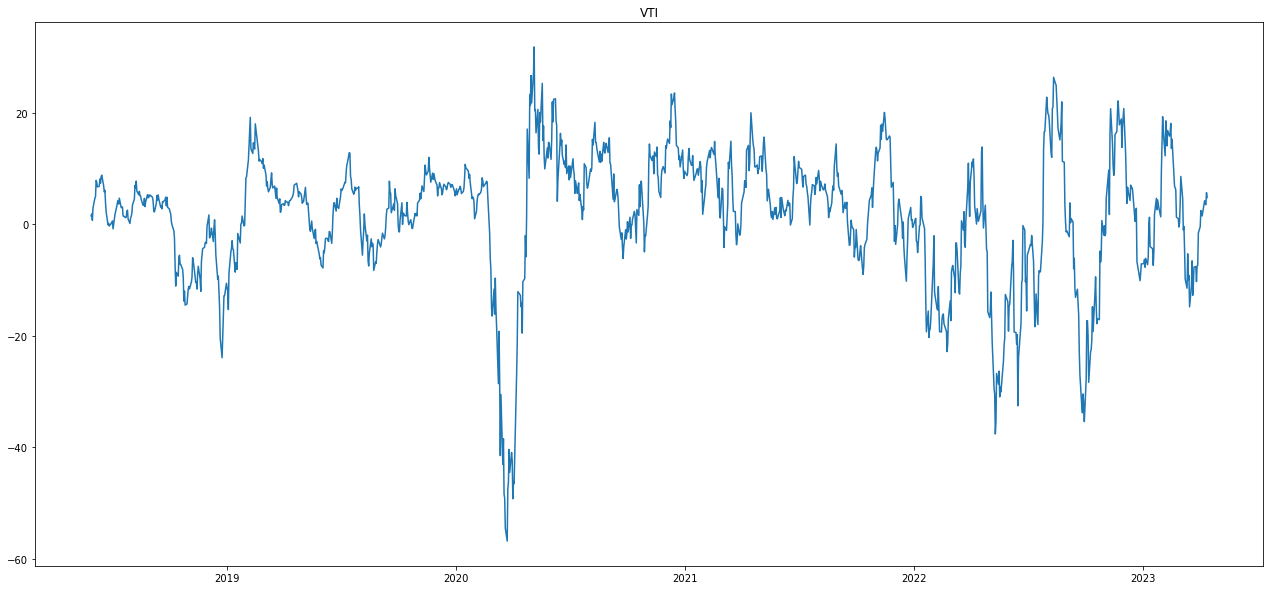

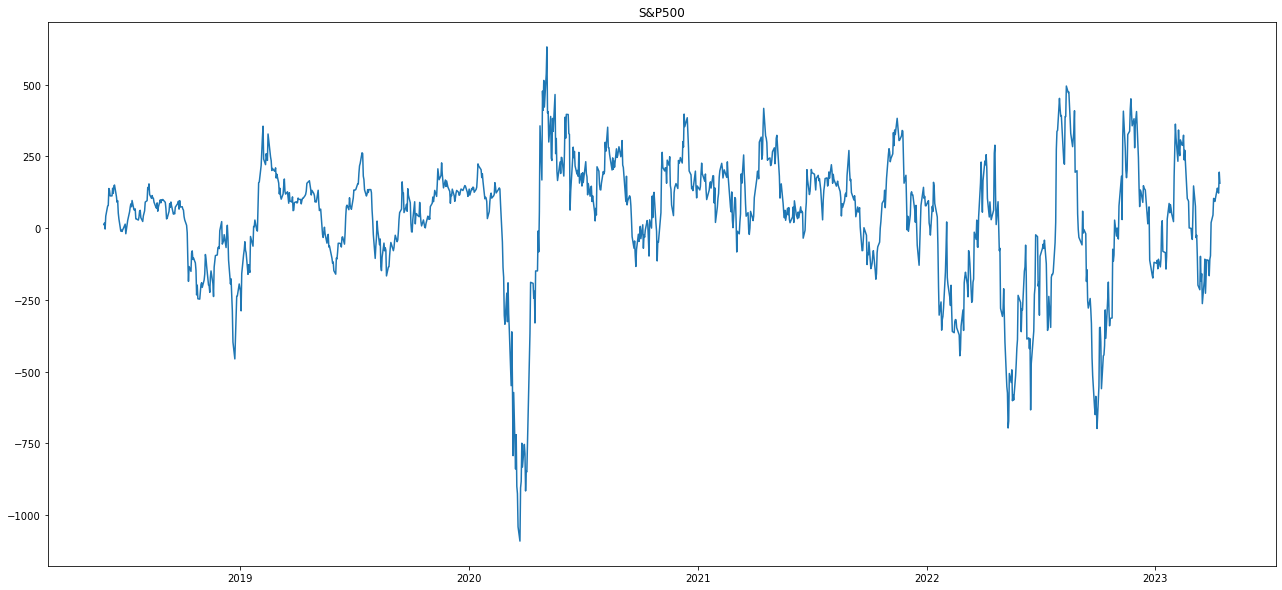

In [30]:
# Retrieve historical prices of the portfolio assets
portfolio_data = pd.DataFrame()
for ticker in portfolio:
    portfolio_data[ticker] = pd.read_csv(f'./portfolio/{ticker}.csv', index_col='Date', usecols=['Date', 'Close'],
                                 parse_dates=True)['Close']
print(portfolio_data)
portfolio_data.plot(figsize=(22,10))

# Loop through each column and plot a graph
for col in portfolio_data.columns:
    plt.figure(figsize=(22,10))
    plt.plot(portfolio_data[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.show()

ret_data=pd.DataFrame()
ret_data=portfolio_data-portfolio_data.shift(30)

print(ret_data)
ret_data.plot(figsize=(22,10))

# Loop through each column and plot a graph
for col in ret_data.columns:
    plt.figure(figsize=(22,10))
    plt.plot(ret_data[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.show()



              GOLD   EXRATE  CRUDE           NDX
Date                                            
2023-04-14  2015.8  81.8462  82.52  13079.519531
2023-04-13  2055.3  81.5600  82.16  13109.389648
2023-04-12  2024.9  81.9745  83.26  12848.349609
2023-04-11  2019.0  82.0464  81.53  12964.150391
2023-04-10  2003.8  82.0556  79.74  13051.230469
...            ...      ...    ...           ...
2018-04-20  1338.3      NaN  68.40   6667.750000
2018-04-19  1348.8      NaN  68.29   6774.890137
2018-04-18  1353.5      NaN  68.47   6833.209961
2018-04-17  1349.5      NaN  66.52   6816.370117
2018-04-16  1350.7      NaN  66.22   6675.180176

[1260 rows x 4 columns]


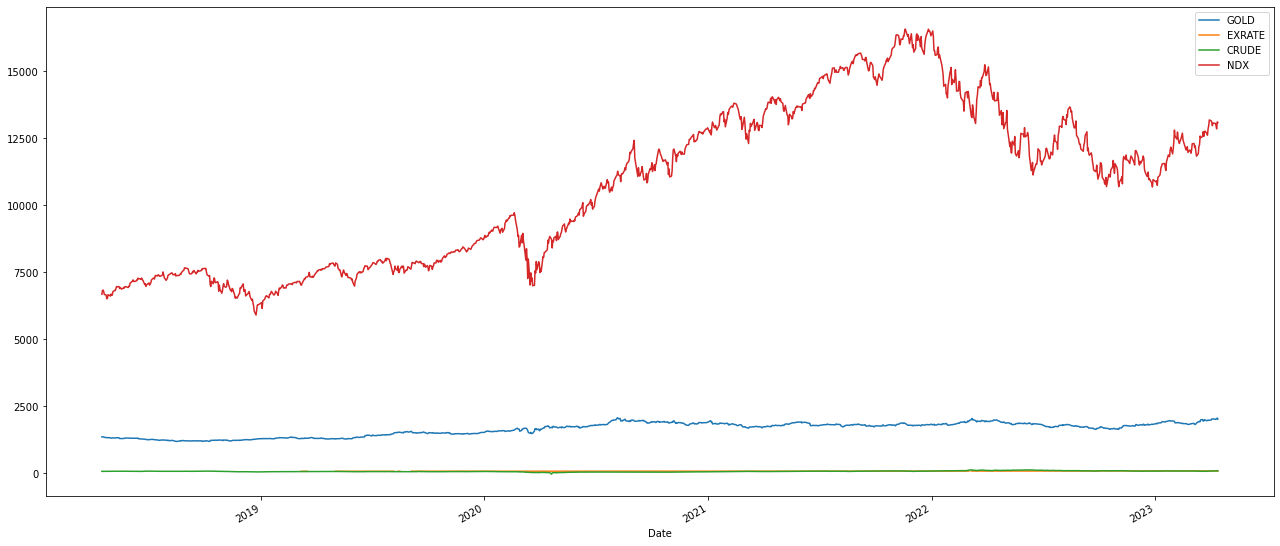

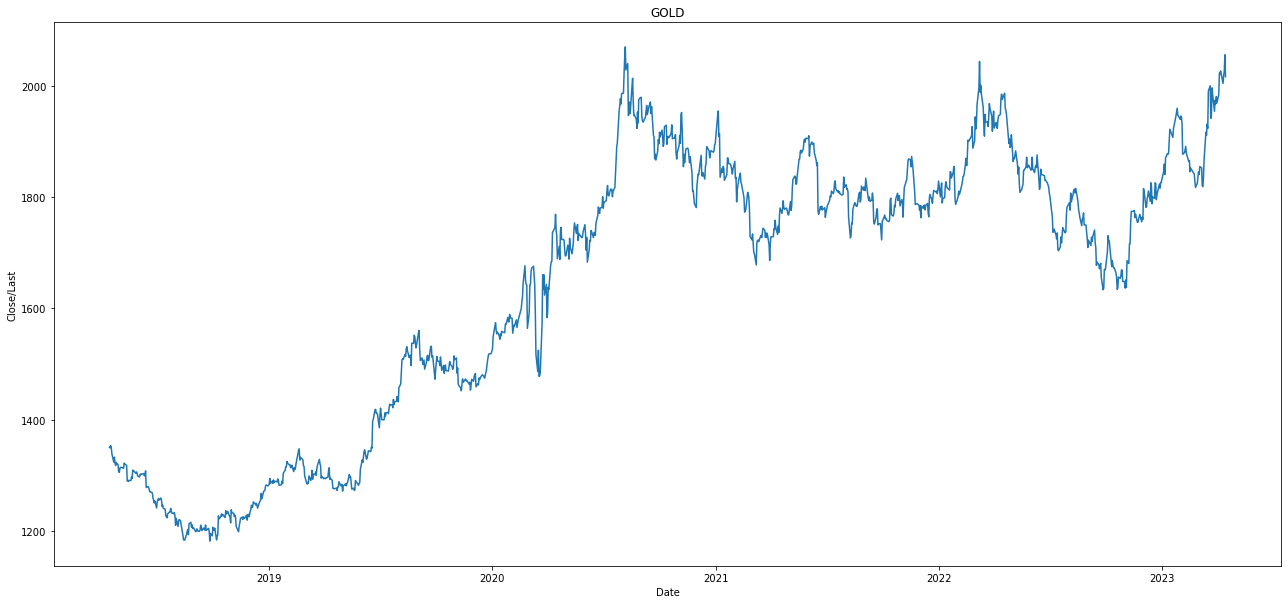

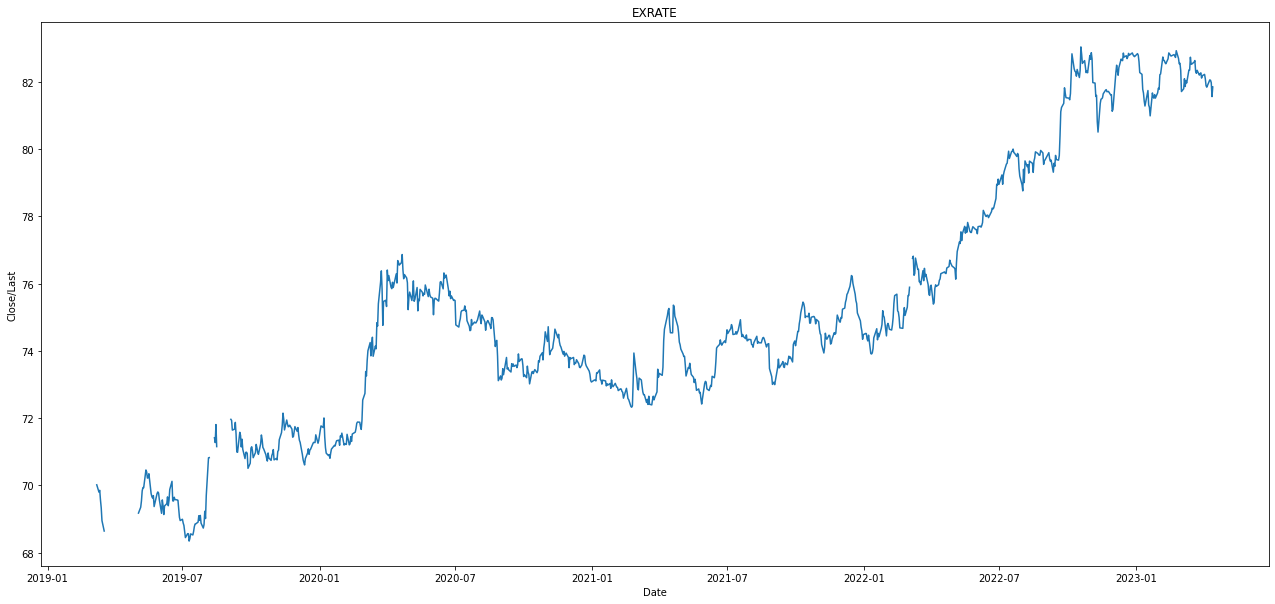

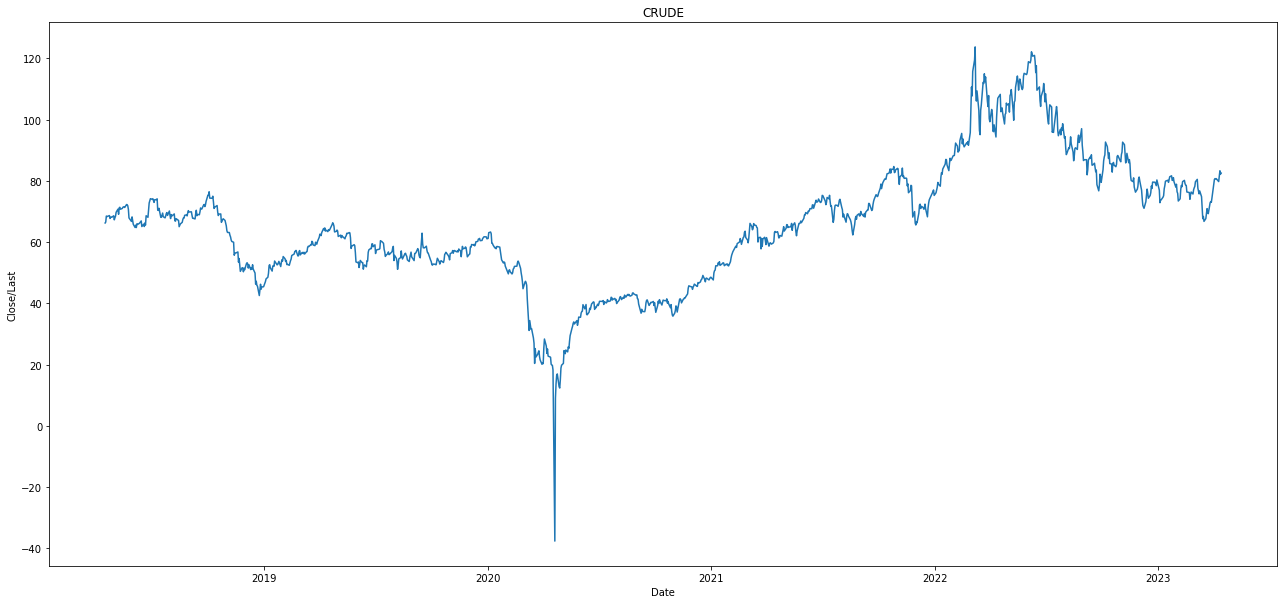

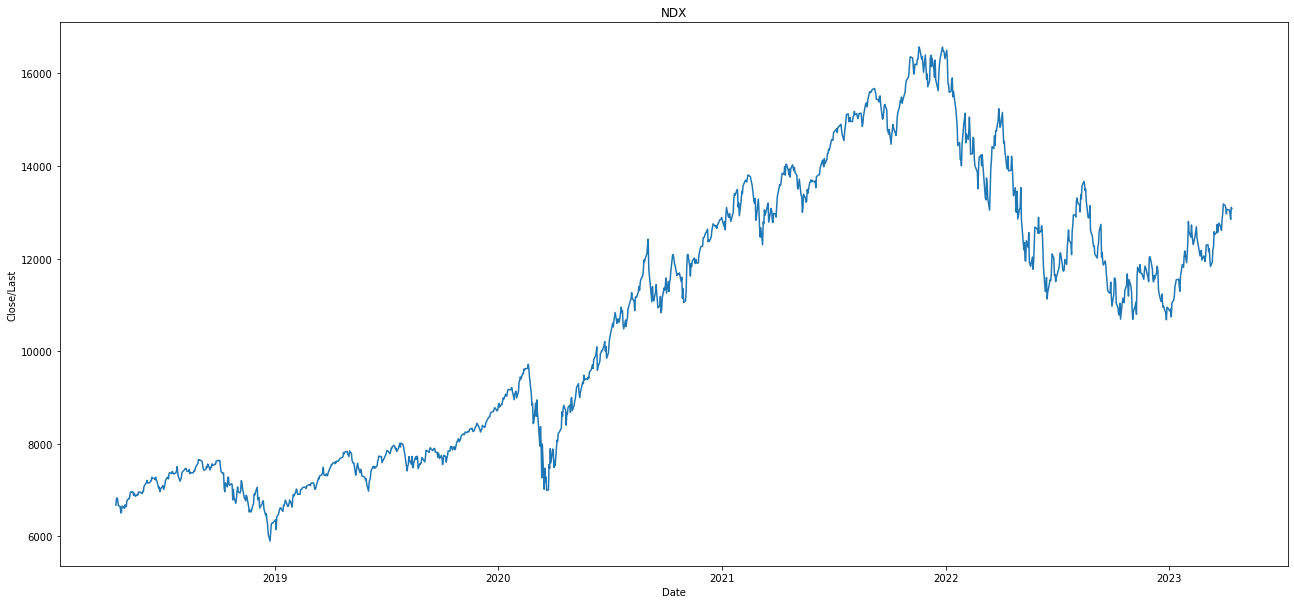

In [13]:
variables = ['GOLD','EXRATE','CRUDE','NDX']  #variables
variables_data = pd.DataFrame()

for ticker in variables:
    variables_data[ticker] = pd.read_csv(f'./variables/{ticker}.csv', index_col='Date', usecols=['Date', 'Close/Last'],
                                  parse_dates=True)['Close/Last']

print(variables_data)     
variables_data.plot(figsize=(22,10))


# Loop through each column and plot a graph
for col in variables_data.columns:
    plt.figure(figsize=(22,10))
    plt.plot(variables_data[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Close/Last')
    plt.show()


In [14]:
df=pd.DataFrame()
df=pd.merge(ret_data,variables_data,on='Date',how='inner')

df[['AMZN','BRK-A','GOOG','META','VTI','S&P500']] = (df[['AMZN','BRK-A','GOOG','META','VTI','S&P500']] / portfolio_data[['AMZN','BRK-A','GOOG','META','VTI','S&P500']].shift(30)) * 100
df.dropna(inplace=True)
df

,AMZN,BRK-A,GOOG,META,VTI,S&P500,GOLD,EXRATE,CRUDE,NDX
Date,,,,,,,,,,
2019-03-08,-2.062319,-0.888359,6.371172,16.299804,4.282550,3.812544,1299.3,70.0190,56.07,7015.689941
2019-03-11,0.002987,-0.083023,7.770003,15.475480,4.828898,4.448431,1291.1,69.8003,56.79,7164.020020
2019-03-12,2.149715,1.074751,11.505678,16.579641,5.957033,5.585415,1296.3,69.8550,56.87,7201.279785
2019-03-13,6.081383,1.089109,12.511554,20.237182,6.785931,6.474242,1309.3,69.5672,58.26,7256.979980
2019-03-14,0.945262,-1.238761,8.859936,13.129903,5.112139,4.752989,1293.4,69.3360,58.61,7243.009766
...,...,...,...,...,...,...,...,...,...,...
2023-04-10,9.272725,3.204427,19.697817,26.034392,2.095452,3.502987,2003.8,82.0556,79.74,13051.230469
2023-04-11,6.569961,4.089091,17.780250,26.135434,1.838250,3.181626,2019.0,82.0464,81.53,12964.150391
2023-04-12,3.820438,4.309368,16.522699,22.327654,1.749194,3.067894,2024.9,81.9745,83.26,12848.349609


/tmp/ipykernel_86300/2139314171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['return'] = (np.dot(df.iloc[:, :6], weights)) / sum(weights)
/tmp/ipykernel_86300/2139314171.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


               return    GOLD   EXRATE  CRUDE           NDX
Date                                                       
2019-03-08   5.377774  1299.3  70.0190  56.07   7015.689941
2019-03-11   6.112508  1291.1  69.8003  56.79   7164.020020
2019-03-12   7.833950  1296.3  69.8550  56.87   7201.279785
2019-03-13   9.846936  1309.3  69.5672  58.26   7256.979980
2019-03-14   6.055111  1293.4  69.3360  58.61   7243.009766
...               ...     ...      ...    ...           ...
2023-04-10  11.296005  2003.8  82.0556  79.74  13051.230469
2023-04-11  10.416546  2019.0  82.0464  81.53  12964.150391
2023-04-12   8.886909  2024.9  81.9745  83.26  12848.349609
2023-04-13  12.419563  2055.3  81.5600  82.16  13109.389648
2023-04-14  11.995709  2015.8  81.8462  82.52  13079.519531

[986 rows x 5 columns]


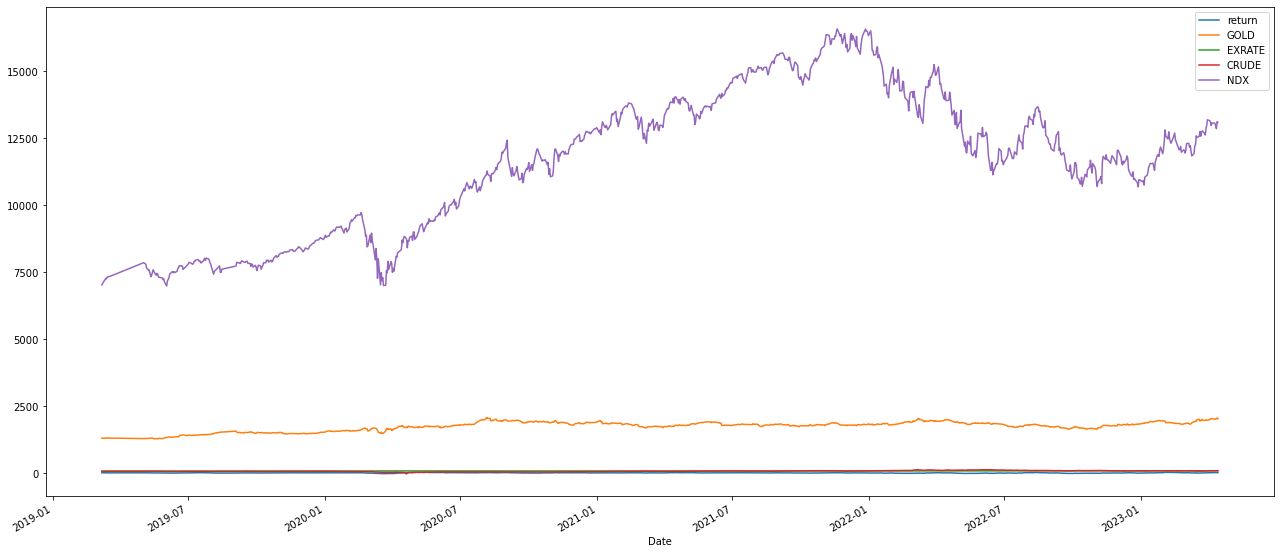

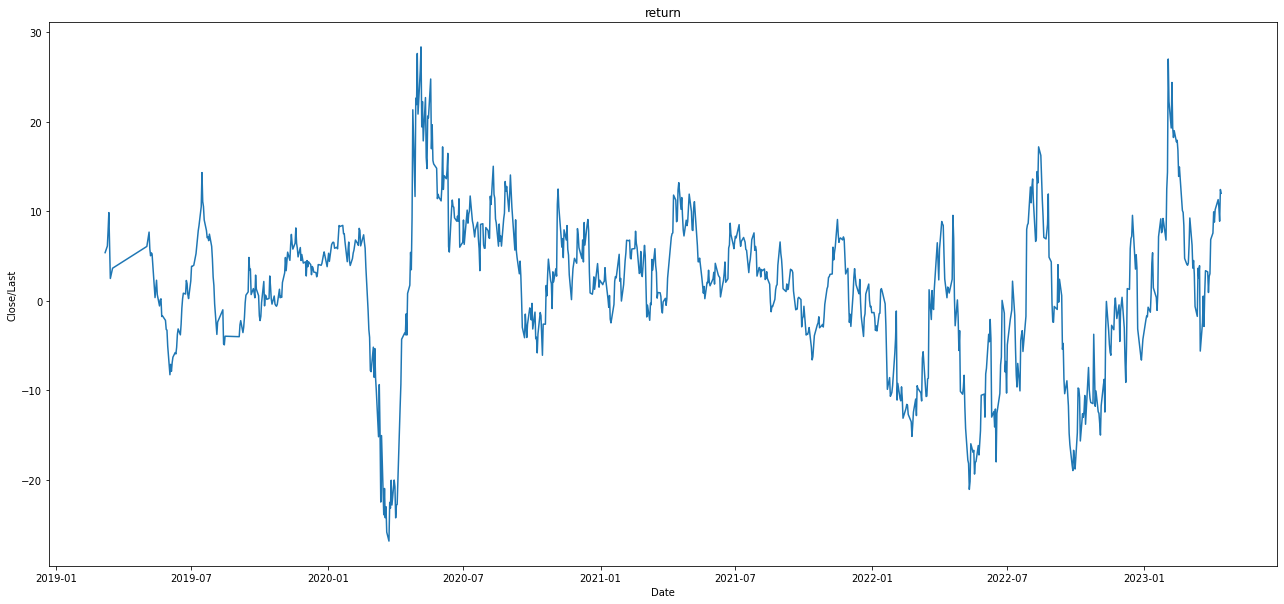

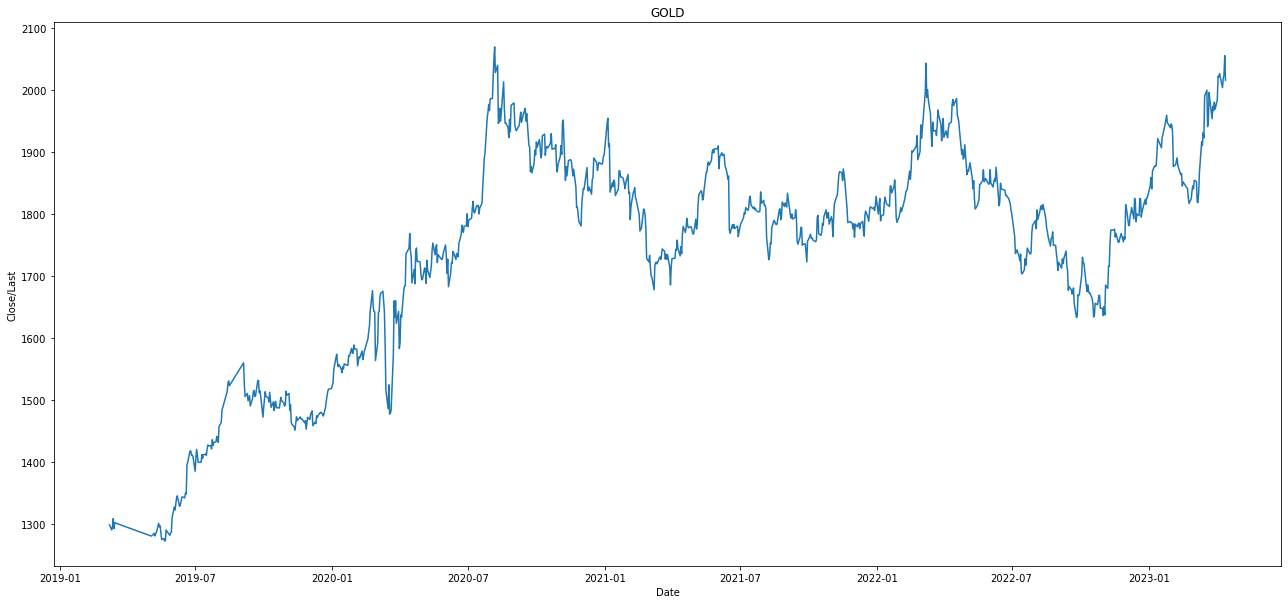

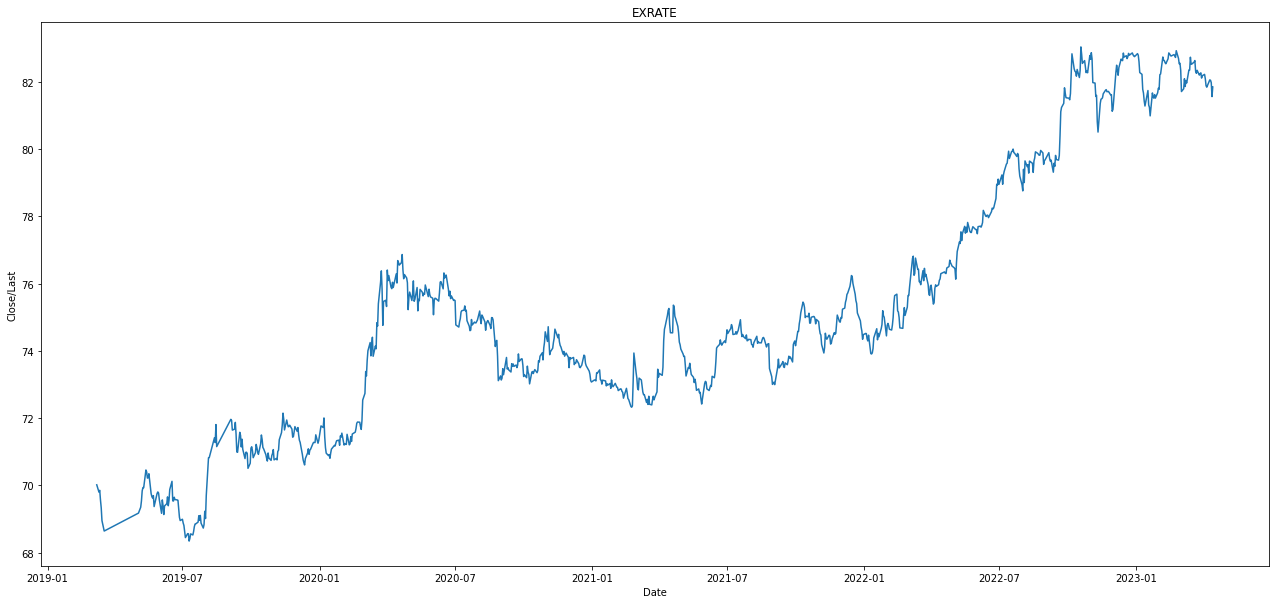

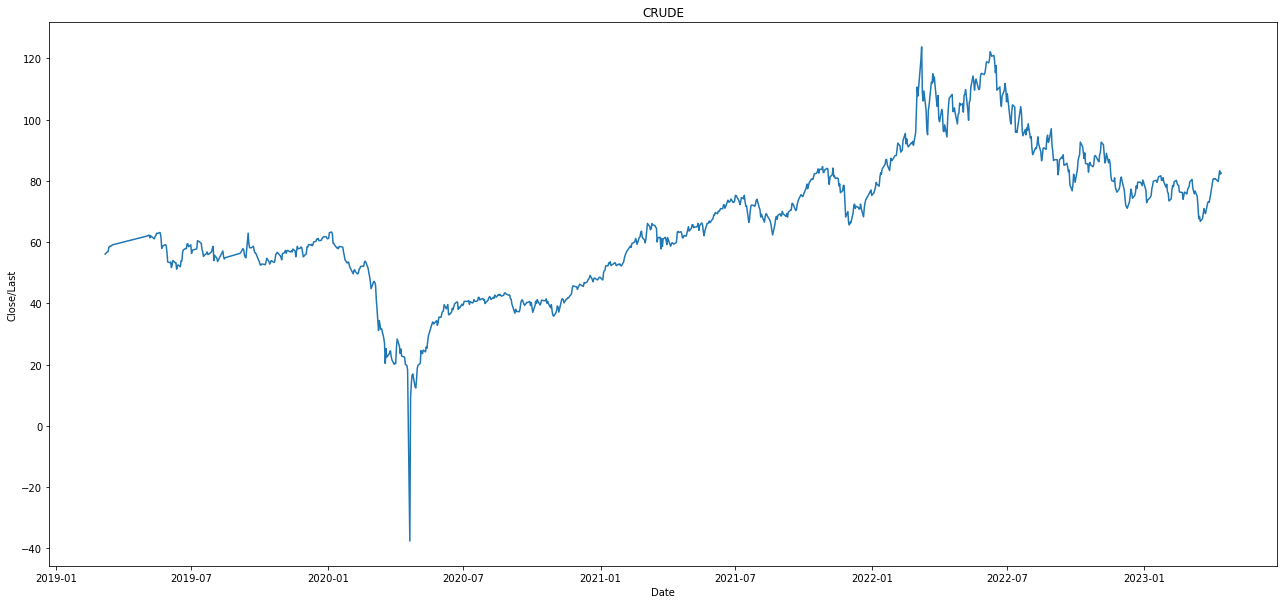

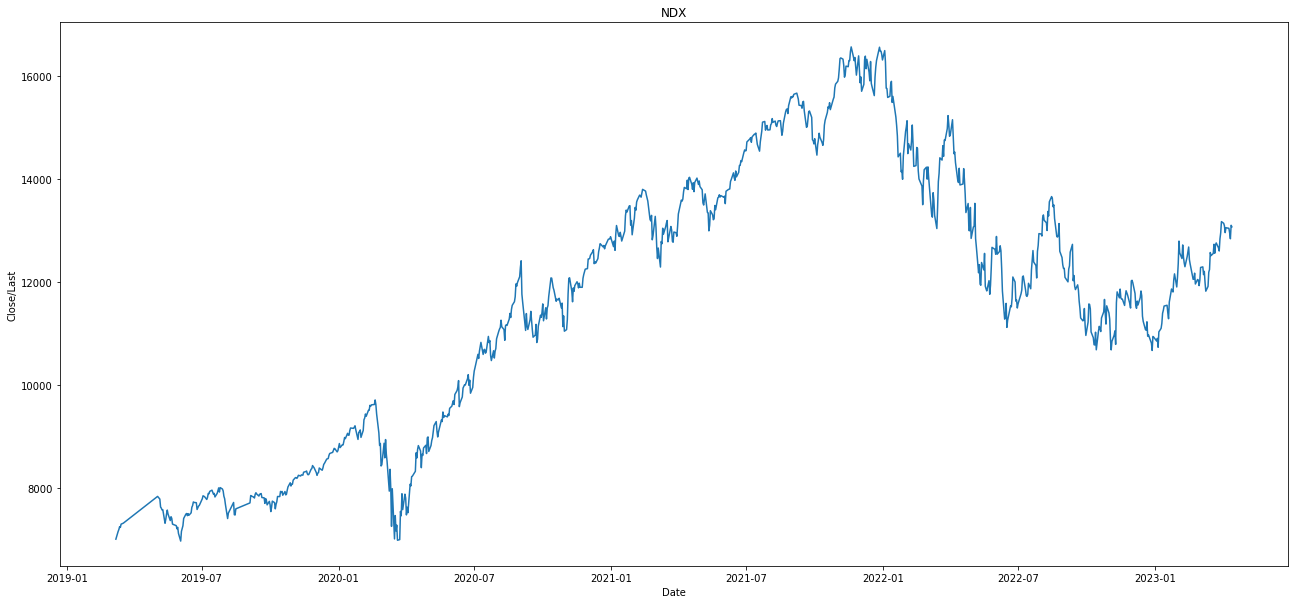

In [26]:
data = pd.DataFrame()
data = df.iloc[:, 6:10]

data['return'] = (np.dot(df.iloc[:, :6], weights)) / sum(weights)


data.dropna(inplace=True)

# get the list of column names
cols = list(data.columns)
# move the last column to the first position
cols = cols[-1:] + cols[:-1]
# reindex the dataset with the new order of columns
data = data.reindex(columns=cols)

print(data)
data.plot(figsize=(22,10))


# Loop through each column and plot a graph
for col in data.columns:
    plt.figure(figsize=(22,10))
    plt.plot(data[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Close/Last')
    plt.show()


In [16]:
ad_fuller_result_1 = adfuller(data['return'])#.diff()[1:])

print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')
print()

ad_fuller_result_2 = adfuller(data['GOLD'].diff()[1:])

print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
print()


ad_fuller_result_3 = adfuller(data['EXRATE'].diff()[1:])

print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')
print()

ad_fuller_result_4 = adfuller(data['CRUDE'].diff()[1:])

print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')
print()

ad_fuller_result_5 = adfuller(data['NDX'].diff()[1:])

print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')

ADF Statistic: -5.2795139309078705
p-value: 6.0368319685366406e-06

ADF Statistic: -14.790021111390425
p-value: 2.178466340554877e-27

ADF Statistic: -11.819283104270639
p-value: 8.490162006715022e-22

ADF Statistic: -21.951735164313426
p-value: 0.0

ADF Statistic: -8.901975223463445
p-value: 1.1647566456618446e-14


In [17]:
print('GOLD causes return?\n')
granger_1 = grangercausalitytests(data[['return', 'GOLD']], 5)

print('\n\nEXRATE causes return?\n')
granger_2 = grangercausalitytests(data[['return', 'EXRATE']], 5)

print('\n\nCRUDE causes return?\n')
granger_3 = grangercausalitytests(data[['return', 'CRUDE']], 5)

print('\n\nNDX causes return?\n')
granger_4 = grangercausalitytests(data[['return', 'NDX']], 5)

GOLD causes return?


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9301  , p=0.3351  , df_denom=982, df_num=1
ssr based chi2 test:   chi2=0.9330  , p=0.3341  , df=1
likelihood ratio test: chi2=0.9325  , p=0.3342  , df=1
parameter F test:         F=0.9301  , p=0.3351  , df_denom=982, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7337  , p=0.0655  , df_denom=979, df_num=2
ssr based chi2 test:   chi2=5.4953  , p=0.0641  , df=2
likelihood ratio test: chi2=5.4800  , p=0.0646  , df=2
parameter F test:         F=2.7337  , p=0.0655  , df_denom=979, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.1160  , p=0.0065  , df_denom=976, df_num=3
ssr based chi2 test:   chi2=12.4364 , p=0.0060  , df=3
likelihood ratio test: chi2=12.3584 , p=0.0063  , df=3
parameter F test:         F=4.1160  , p=0.0065  , df_denom=976, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F

In [18]:
# Remove column name 'CRUDE'
data.drop('NDX', axis=1,inplace=True)
data.drop('EXRATE', axis=1,inplace=True)

data

,return,GOLD,CRUDE
Date,,,
2019-03-08,5.377774,1299.3,56.07
2019-03-11,6.112508,1291.1,56.79
2019-03-12,7.833950,1296.3,56.87
2019-03-13,9.846936,1309.3,58.26
2019-03-14,6.055111,1293.4,58.61
...,...,...,...
2023-04-10,11.296005,2003.8,79.74
2023-04-11,10.416546,2019.0,81.53
2023-04-12,8.886909,2024.9,83.26


In [19]:
train_df=data[:-30]
test_df=data[-30:]
print(train_df)
print(test_df)

              return    GOLD  CRUDE
Date                               
2019-03-08  5.377774  1299.3  56.07
2019-03-11  6.112508  1291.1  56.79
2019-03-12  7.833950  1296.3  56.87
2019-03-13  9.846936  1309.3  58.26
2019-03-14  6.055111  1293.4  58.61
...              ...     ...    ...
2023-02-24  4.734287  1817.1  76.32
2023-02-27  4.069295  1824.9  75.68
2023-02-28  3.966830  1836.7  77.05
2023-03-01  4.229242  1845.4  77.69
2023-03-02  6.278340  1840.5  78.16

[956 rows x 3 columns]
               return    GOLD  CRUDE
Date                                
2023-03-03   9.242862  1854.6  79.68
2023-03-06   6.205897  1852.4  80.46
2023-03-07   3.652892  1820.0  77.58
2023-03-08   4.501504  1818.6  76.66
2023-03-09   2.988977  1834.6  75.72
2023-03-10  -0.622127  1867.2  76.68
2023-03-13  -1.731859  1916.5  74.80
2023-03-14   3.638291  1910.9  71.33
2023-03-15   2.559988  1931.3  67.61
2023-03-16   3.921017  1923.0  68.35
2023-03-17  -5.603373  1990.2  66.74
2023-03-20  -2.422152  1999

In [20]:
model = VAR(train_df.diff()[1:])
sorted_order=model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        9.965       9.981   2.127e+04       9.971
1        9.874      9.935*   1.941e+04       9.897
2        9.847       9.954   1.889e+04      9.888*
3        9.856       10.01   1.908e+04       9.915
4        9.834       10.03   1.867e+04       9.911
5        9.842       10.09   1.882e+04       9.936
6        9.827       10.12   1.853e+04       9.939
7        9.830       10.17   1.859e+04       9.959
8        9.834       10.22   1.865e+04       9.980
9       9.826*       10.26  1.851e+04*       9.990
10       9.837       10.31   1.871e+04       10.02
--------------------------------------------------


/home/kartik/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
var_model = VARMAX(train_df, order=(9,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

/home/kartik/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kartik/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                Statespace Model Results                               
Dep. Variable:     ['return', 'GOLD', 'CRUDE']   No. Observations:                  956
Model:                                  VAR(9)   Log Likelihood               -8680.964
                                   + intercept   AIC                          17541.928
Date:                         Thu, 20 Apr 2023   BIC                          17979.576
Time:                                 08:21:26   HQIC                         17708.628
Sample:                                      0                                         
                                         - 956                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):       0.01, 0.01, 0.01   Jarque-Bera (JB):   236.08, 479.92, 885770.42
Prob(Q):                  0.92, 0.92, 0.91   Prob(JB):                    0.00, 0.00, 0.00
Heteroskedasticity (H):   

In [22]:
n_forecast = 30
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean
predictions.columns=['return_pred','GOLD_pred','CRUDE_pred']
print(predictions)

     return_pred    GOLD_pred  CRUDE_pred
956     5.837459  1842.468308   78.024502
957     5.596317  1841.660566   78.312804
958     4.888626  1838.644482   77.648642
959     4.638550  1836.759894   77.513984
960     4.458142  1834.302309   77.589998
961     4.073245  1832.651477   77.705151
962     4.289238  1831.198798   77.868730
963     3.952927  1828.283374   78.013783
964     3.888021  1827.697623   78.124545
965     3.667947  1826.432423   78.147612
966     3.547857  1825.383920   78.194681
967     3.401620  1824.266153   78.247081
968     3.186942  1822.829051   78.265323
969     3.085817  1821.759239   78.343331
970     2.913709  1820.202213   78.361434
971     2.791352  1818.959319   78.410543
972     2.662618  1817.671306   78.458737
973     2.547612  1816.491210   78.506012
974     2.448469  1815.350957   78.561213
975     2.333972  1814.189769   78.598614
976     2.239375  1813.140906   78.648374
977     2.140718  1812.037326   78.686925
978     2.050102  1810.969412   78

/home/kartik/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


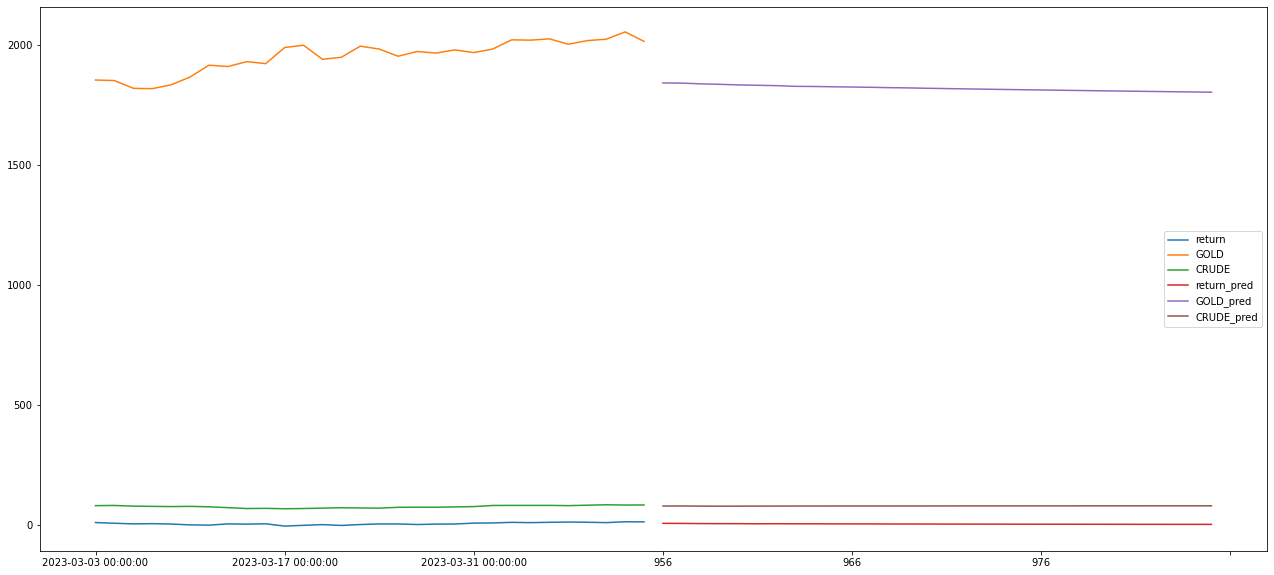

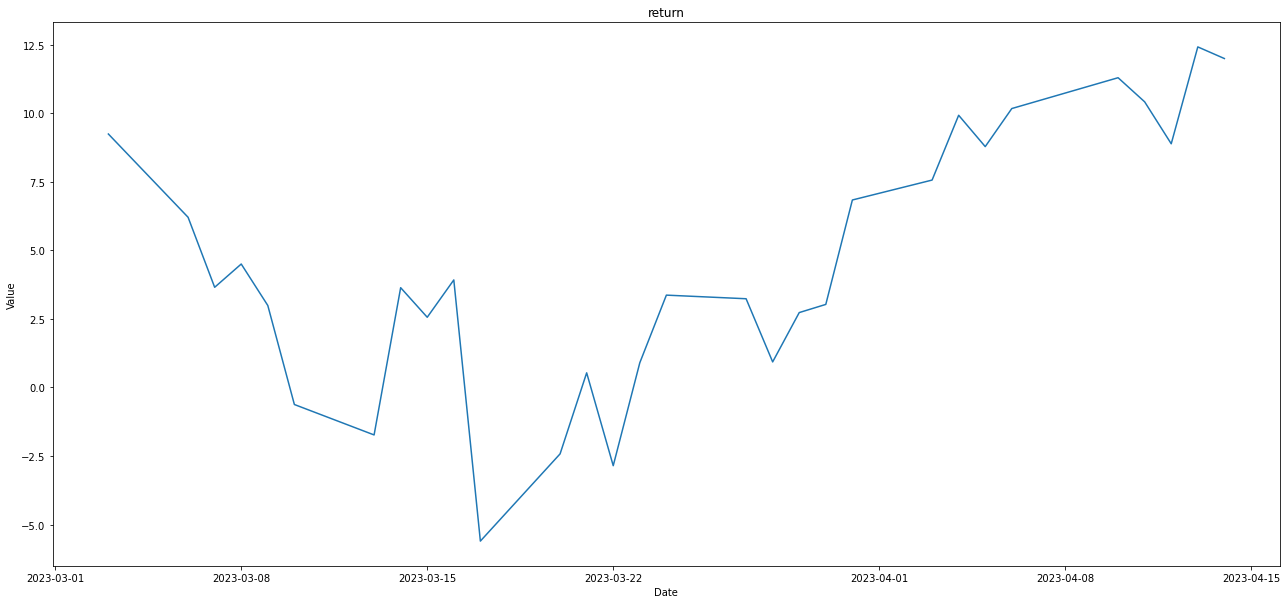

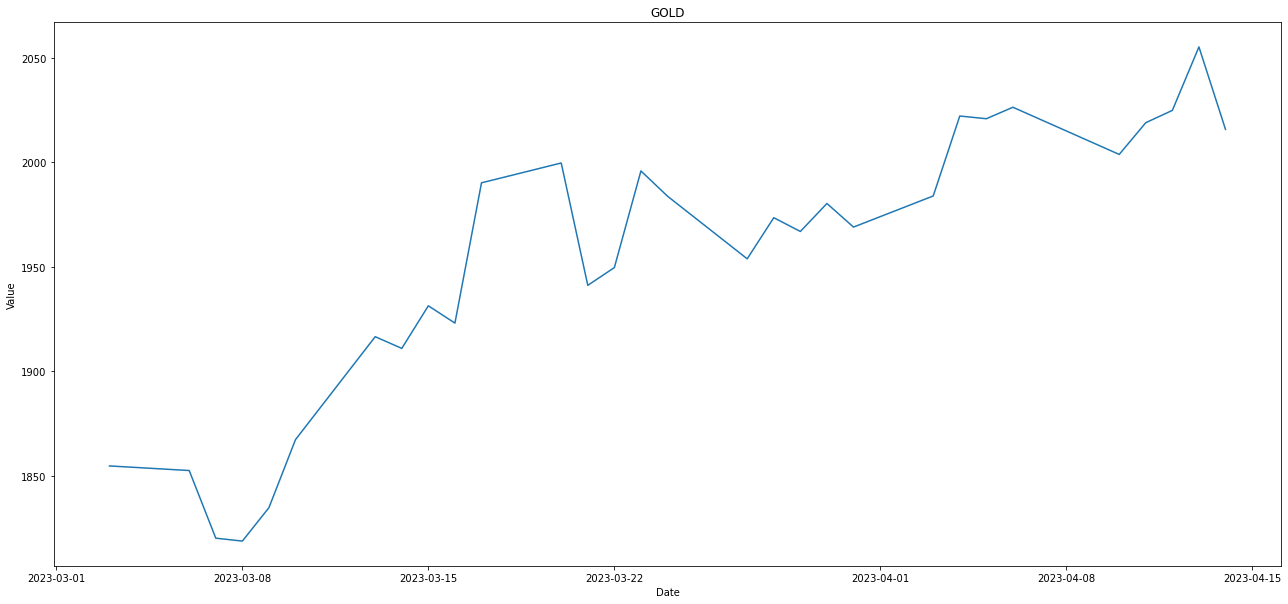

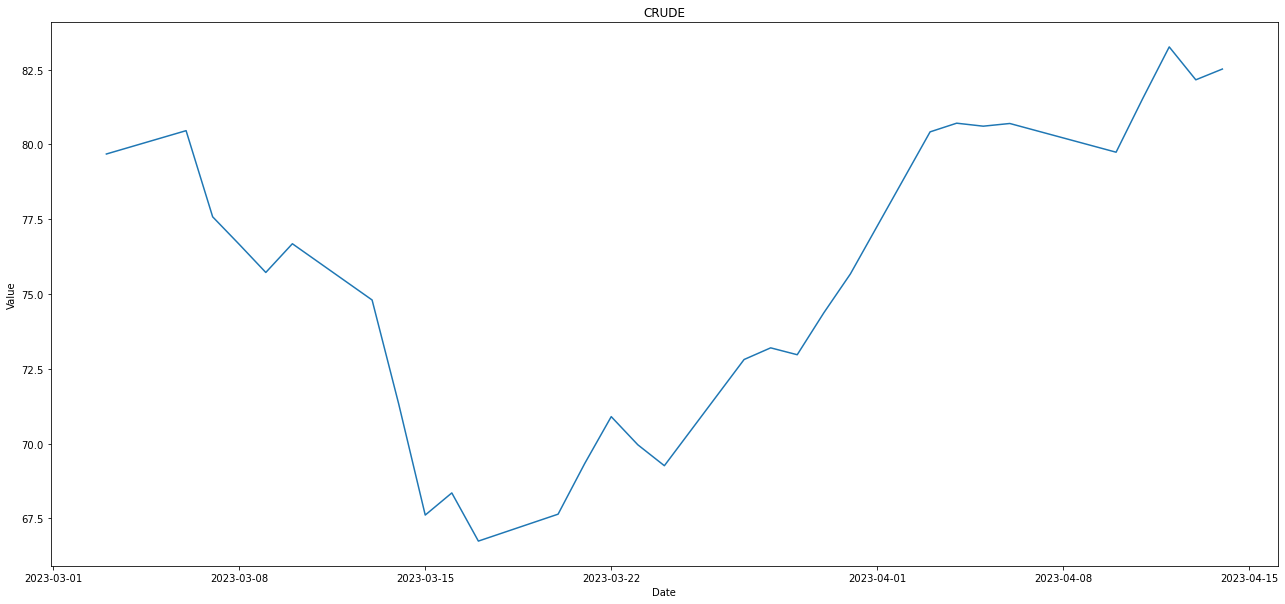

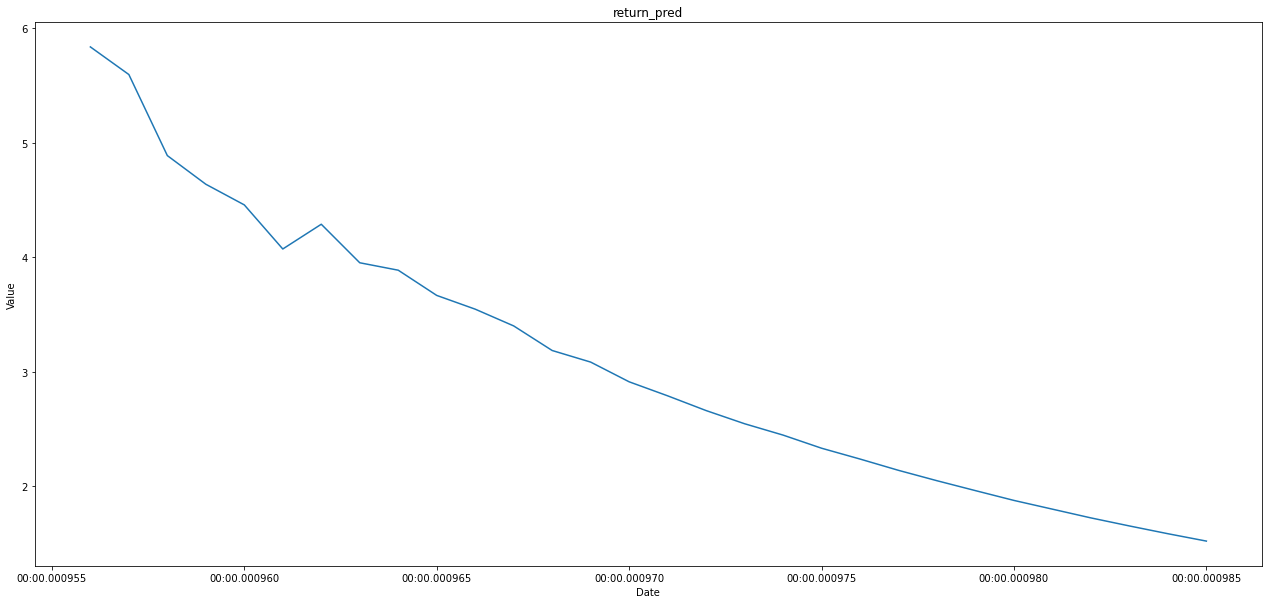

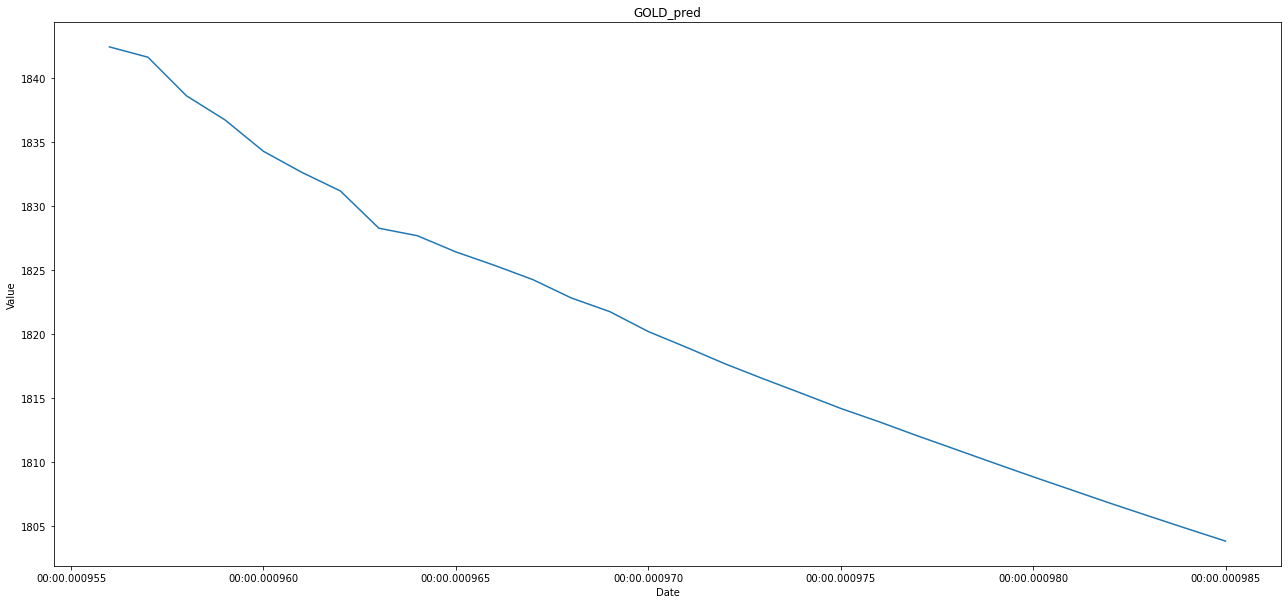

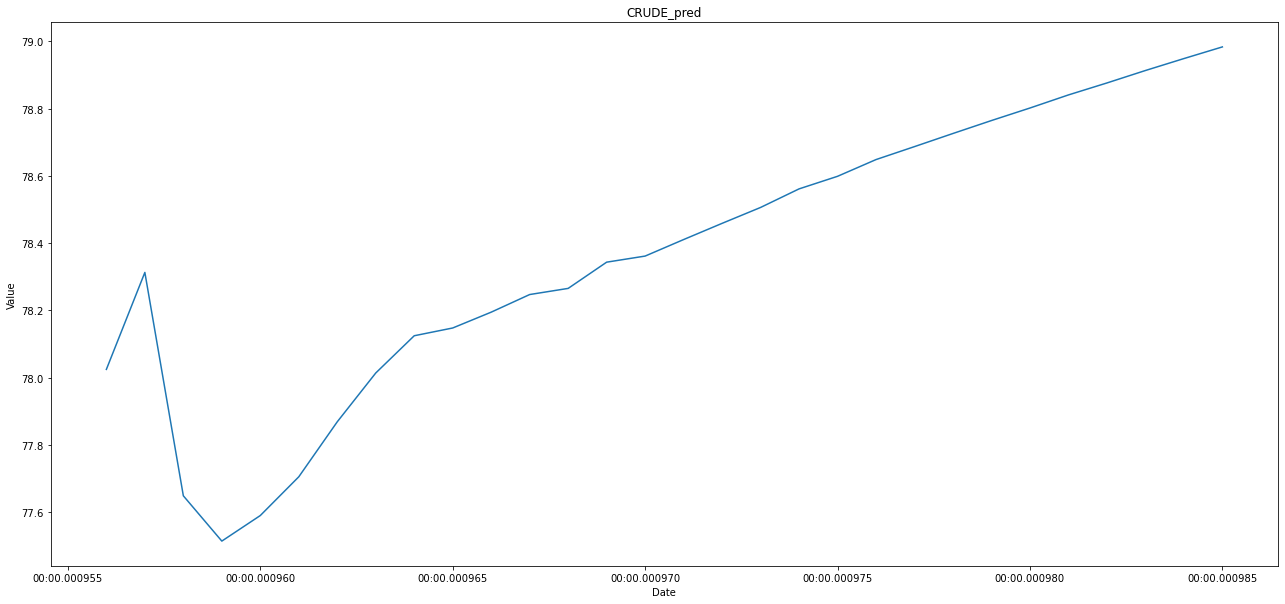

In [33]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)
test_vs_pred.plot(figsize=(22,10))
# Loop through each column and plot a graph
for col in test_vs_pred.columns:
    plt.figure(figsize=(22,10))
    plt.plot(test_vs_pred[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

In [17]:
rmse_return=math.sqrt(mean_squared_error(predictions['return_pred'],test_df['return']))
print('Mean value of return is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['return']),rmse_return))
print()

rmse_exrate=math.sqrt(mean_squared_error(predictions['CRUDE_pred'],test_df['CRUDE']))
print('Mean value of CRUDE is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['CRUDE']),rmse_exrate))
print()

rmse_gold=math.sqrt(mean_squared_error(predictions['GOLD_pred'],test_df['GOLD']))
print('Mean value of GOLD is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['GOLD']),rmse_gold))
print()

Mean value of return is : 3.092511206109605. Root Mean Squared Error is :5.5275953926818815

Mean value of CRUDE is : 75.44566666666667. Root Mean Squared Error is :5.739175151643373

Mean value of GOLD is : 1953.5033333333333. Root Mean Squared Error is :153.38642360946992

